In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#Loading the data
bank_data=pd.read_csv("bank-full.csv",sep=";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Checking for null values
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
#print(bank_data['job'].value_counts())
#print(bank_data['month'].value_counts())

In [41]:
#Converting categorical data into numeric data
labels_job = bank_data['job'].astype('category').cat.categories.tolist()
replace_job_values = {'job' : {k: v for k,v in zip(labels_job,list(range(1,len(labels_job)+1)))}}

labels_marital = bank_data['marital'].astype('category').cat.categories.tolist()
replace_marital_values = {'marital' : {k: v for k,v in zip(labels_marital,list(range(1,len(labels_marital)+1)))}}

labels_education = bank_data['education'].astype('category').cat.categories.tolist()
replace_education_values = {'education' : {k: v for k,v in zip(labels_education,list(range(1,len(labels_education)+1)))}}

labels_default = bank_data['default'].astype('category').cat.categories.tolist()
replace_default_values = {'default' : {k: v for k,v in zip(labels_default,list(range(0,len(labels_default)+1)))}}

labels_housing = bank_data['housing'].astype('category').cat.categories.tolist()
replace_housing_values = {'housing' : {k: v for k,v in zip(labels_housing,list(range(0,len(labels_housing)+1)))}}

labels_loan = bank_data['loan'].astype('category').cat.categories.tolist()
replace_loan_values = {'loan' : {k: v for k,v in zip(labels_housing,list(range(0,len(labels_loan)+1)))}}

labels_contact = bank_data['contact'].astype('category').cat.categories.tolist()
replace_contact_values = {'contact' : {k: v for k,v in zip(labels_contact,list(range(1,len(labels_contact)+1)))}}

labels_month = bank_data['month'].astype('category').cat.categories.tolist()
replace_month_values = {'month' : {k: v for k,v in zip(labels_month,list(range(1,len(labels_month)+1)))}}
print(replace_month_values)

labels_poutcome = bank_data['poutcome'].astype('category').cat.categories.tolist()
replace_poutcome_values = {'poutcome' : {k: v for k,v in zip(labels_poutcome,list(range(1,len(labels_poutcome)+1)))}}

labels_y = bank_data['y'].astype('category').cat.categories.tolist()
replace_y_values = {'y' : {k: v for k,v in zip(labels_y,list(range(0,len(labels_y)+1)))}}
print(replace_y_values)

{'month': {'apr': 1, 'aug': 2, 'dec': 3, 'feb': 4, 'jan': 5, 'jul': 6, 'jun': 7, 'mar': 8, 'may': 9, 'nov': 10, 'oct': 11, 'sep': 12}}
{'y': {'no': 0, 'yes': 1}}


In [6]:
bank_data1=bank_data

In [7]:
bank_data1.replace(replace_job_values,inplace=True)
bank_data1.replace(replace_marital_values,inplace=True)
bank_data1.replace(replace_education_values,inplace=True)
bank_data1.replace(replace_default_values,inplace=True)
bank_data1.replace(replace_housing_values,inplace=True)
bank_data1.replace(replace_loan_values,inplace=True)
bank_data1.replace(replace_contact_values,inplace=True)
bank_data1.replace(replace_month_values,inplace=True)
bank_data1.replace(replace_poutcome_values,inplace=True)
bank_data1.replace(replace_y_values,inplace=True)
bank_data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5,2,3,0,2143,1,0,3,5,9,261,1,-1,0,4,0
1,44,10,3,2,0,29,1,0,3,5,9,151,1,-1,0,4,0
2,33,3,2,2,0,2,1,1,3,5,9,76,1,-1,0,4,0
3,47,2,2,4,0,1506,1,0,3,5,9,92,1,-1,0,4,0
4,33,12,3,4,0,1,0,0,3,5,9,198,1,-1,0,4,0


In [8]:
bank_data1.shape

(45211, 17)

In [9]:
#Dividing our data into input and output variable
# Model building 
#Building our first model
from sklearn.linear_model import LogisticRegression
X=bank_data1.iloc[:,0:16]
Y=bank_data1.iloc[:,16]
Model1=LogisticRegression()
Model1.fit(X,Y)

C:\Users\KUNAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#Evaluating the logistic regression model
#Confusion Matrix
Model1_pred=Model1.predict(X)
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,Model1_pred)
print(confusion_matrix)

[[39209   713]
 [ 4362   927]]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(Y,Model1_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [12]:
# As contact communication type is not that much useful as compare to other so remove contact column
bank_data2=bank_data1
bank_data2.drop(["contact"],axis=1,inplace=True)
bank_data2.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5,2,3,0,2143,1,0,5,9,261,1,-1,0,4,0
1,44,10,3,2,0,29,1,0,5,9,151,1,-1,0,4,0
2,33,3,2,2,0,2,1,1,5,9,76,1,-1,0,4,0
3,47,2,2,4,0,1506,1,0,5,9,92,1,-1,0,4,0
4,33,12,3,4,0,1,0,0,5,9,198,1,-1,0,4,0


In [13]:
#Build our second model
X2=bank_data1.iloc[:,0:15]
Y2=bank_data1.iloc[:,15]
Model2=LogisticRegression()
Model2.fit(X2,Y2)

C:\Users\KUNAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#Evaluating our second model
#Confusion Matrix
Model2_pred=Model2.predict(X2)
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y2,Model2_pred)
print(confusion_matrix)

[[39232   690]
 [ 4392   897]]


In [15]:
print(classification_report(Y2,Model2_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.17      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [16]:
# Creating new column for storing predicted values of y
bank_data2["pred_prob"] = Model2_pred

In [17]:
#Crosscheck of 1 and 0
#bank_data2.loc[bank_data2['pred_prob'] == 1]
#bank_data1.loc[(bank_data1['pred_prob'] > 0) & (bank_data1['pred_prob'] < 1)]

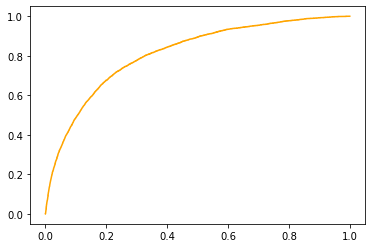

In [18]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(Y2,Model2.predict_proba(X2)[:,1])
auc=roc_auc_score(Y2,Model2_pred)
#print("Acuuracy:",auc,"\n")
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='orange',label='logit model ( area= %0.2f)'%auc)

In [19]:
#Making data set for train and test model by removing "pred_prob" col
Bank_data3=bank_data2
Bank_data3.drop("pred_prob",axis=1,inplace=True)

In [20]:
# Dividing data into train and test data sets
from sklearn.model_selection import train_test_split

In [21]:
train,test = train_test_split(Bank_data3,test_size=0.3)

In [22]:
# Building a model on train data set 
import statsmodels.formula.api as sm
train_model = sm.logit('y~age+job+marital+education+default+balance+housing+loan+day+month+duration+campaign+pdays+previous+poutcome',data = train).fit()

Optimization terminated successfully.
         Current function value: 0.280435
         Iterations 7


In [23]:
#summary
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31631
Method:                           MLE   Df Model:                           15
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:                  0.2344
Time:                        09:30:44   Log-Likelihood:                -8874.9
converged:                       True   LL-Null:                       -11593.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3283      0.220    -19.707      0.000      -4.759      -3.898
age            0.0056      0.002      2.855      0.004       0.002       0.009
job            0.0154      0.006      2.473      0.013       0.003       0.028
marital        0.1867      0.036      5.163      0.000       0.116       0.258
education      0.2034      0.027      7.655      0.000       0.151       0.256
default       -0.3630      0.194     -1.867      0.062      -0.744       0.018
balance     1.872e-05   5.25e-06      3.563      0.000    8.42e-06     2.9e-05
housing       -1.1651      0.044    -26.257      0.000      -1.252      -1.078
loan          -0.7627      0.069    -11.064      0.000      -0.898      -0.628
day           -0.0036      0.002     -1.493      0.136      -0.008       0.001
month          0.0057      0.006      0.870      0.384      -0.007       0.018
duration       0.0039   7.11e-05     54.275      0.000       0.004       0.004
campaign      -0.1314      0.012    -11.371      0.000      -0.154      -0.109
pdays          0.0040      0.000     13.004      0.000       0.003       0.005
previous       0.0915      0.010      9.415      0.000       0.072       0.111
poutcome       0.1484      0.034      4.314      0.000       0.081       0.216
==============================================================================
"""

In [24]:
train_pred = train_model.predict(train.iloc[:,0:15])

In [25]:
train_pred.shape

(31647,)

In [26]:
# filling all the cells with zeroes
train["train_pred"] = np.zeros(31647)

<ipython-input-26-f44cbecd5172>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["train_pred"] = np.zeros(31647)


In [27]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
train.loc[train_pred>0.5,"train_pred"] = 1

C:\Users\KUNAL\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
# confusion matrix 
confusion_matrix = pd.crosstab(train['y'],train.train_pred)
confusion_matrix

train_pred,0.0,1.0
y,,
0,27329,530
1,3037,751


In [29]:
train_accuracy=(27418+768)/31647
train_accuracy

0.8906373431920878

In [30]:
# Prediction on Test data set
test_pred = train_model.predict(test)

In [31]:
test_pred.shape

(13564,)

In [32]:
# filling all the cells with zeroes
test["test_pred"] = np.zeros(13564)

<ipython-input-32-de5b8ebe3e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["test_pred"] = np.zeros(13564)


In [33]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
test.loc[test_pred>0.5,"train_pred"] = 1

C:\Users\KUNAL\anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [34]:
# confusion matrix 
confusion_matrix_test = pd.crosstab(test['y'],test.test_pred)
confusion_matrix_test

test_pred,0.0
y,
0,12063
1,1501


In [35]:
test_accuracy=(11991)/13564
test_accuracy

0.8840312592155706